# TensorFlow LinearRegression with single variables

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
num_points = 1000
vectors_set = []
for i in range(num_points):
	x1 = np.random.normal(0.0, 0.55) # normal distribution (mean, sigma)
	y1 = x1*0.1 + 0.3 + np.random.normal(0.0, 0.03)
	vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

### 뭘 만드려고 한걸까요?

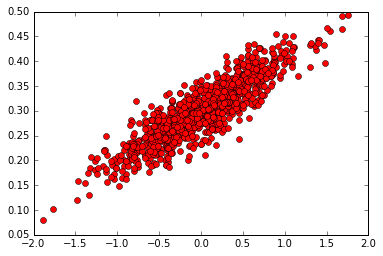

In [3]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'ro', label='Original data')
plt.show()

In [4]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
h = W * x_data + b
cost = tf.reduce_mean(tf.square(h - y_data))

In [5]:
alpha = 0.5

In [6]:
optimizer = tf.train.GradientDescentOptimizer(alpha)
train = optimizer.minimize(cost)

In [7]:
init = tf.initialize_all_variables()

0 [-0.36057407] [ 0.30149585] 0.0625476


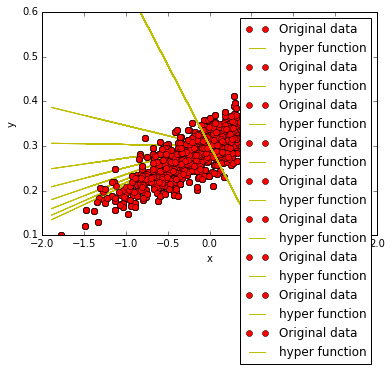

1 [-0.22683355] [ 0.30113828] 0.031959


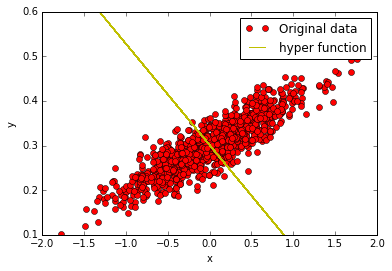

2 [-0.13185939] [ 0.3008855] 0.0165333


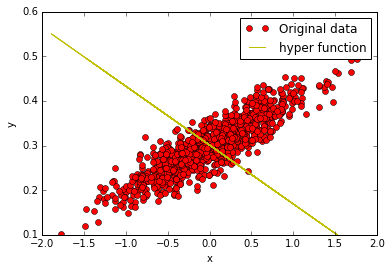

3 [-0.06441471] [ 0.30070597] 0.00875415


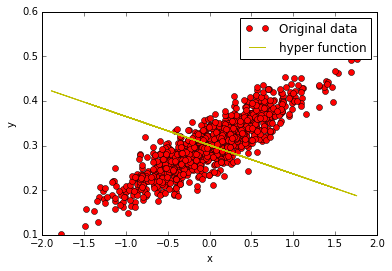

4 [-0.01651971] [ 0.3005785] 0.00483118


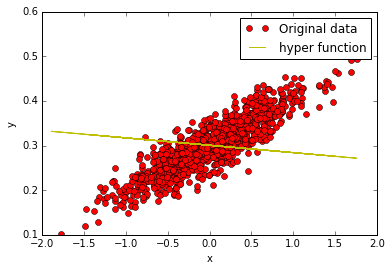

5 [ 0.01749232] [ 0.30048797] 0.00285285


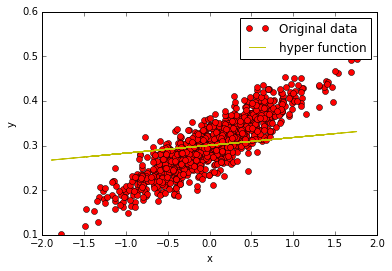

6 [ 0.04164554] [ 0.30042368] 0.00185519


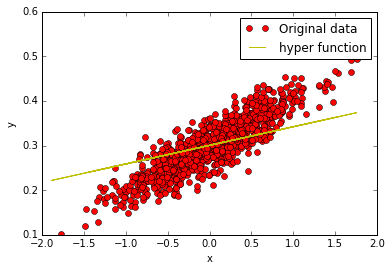

7 [ 0.05879764] [ 0.30037802] 0.00135207


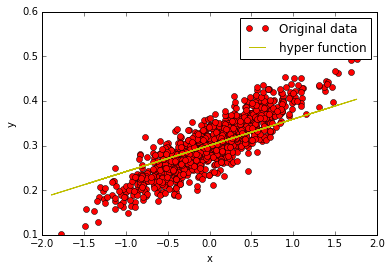

In [9]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(8):
        sess.run(train)

        print(step, sess.run(W), sess.run(b), sess.run(cost))
        plt.plot(x_data, y_data, 'ro', label='Original data')
        plt.plot(x_data, sess.run(W)*x_data+sess.run(b), 'y-', label='hyper function')
        plt.xlabel('x')
        plt.xlim(-2, 2)
        plt.ylabel('y')
        plt.ylim(0.1, 0.6)
        plt.legend()
        plt.show()